# Replication to Vaccines RCTs

## Polio

In [1]:
using Pkg
#Pkg.build("PyCall")

#Pkg.add("PyCall")

using PyCall
using Distributions

In [2]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\Luis\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

In [3]:
NT = 200745 #number of treated

NC = 201229 #number of controlled

YT = 33/NT  #average outcome for treated

YC =115/NC  #average outcome for controlled

#incidence per 100000 

print("Incidence per 100000 among treated:", (YT*100000), "%. ")

print( "Incidence per 100000 among controlled:", (YC*100000),"%.")

Incidence per 100000 among treated:16.438765598146905%. Incidence per 100000 among controlled:57.14882049803955%.

In [4]:
# treatment effect estimate reduction in incidence  per 100000 people

delta_hat = 100000*(YT-YC)

print("Estimate TE of occurances per 100,000 ", (100000*(YT-YC)))

Estimate TE of occurances per 100,000 -40.71005489989265

In [5]:
Var_delta_hat =  (100000^2)*(YT*(1-YT)/NT +  YC*(1-YC)/NC)

# standard deviation

print("Standard deviation for ATE ",(Var_delta_hat^.5))

Standard deviation for ATE 6.047412320702958

In [6]:
# here we are using the fact that outcomes are Bernoulli 

CI_delta0 = delta_hat -1.96*Var_delta_hat^.5
CI_delta1 = delta_hat +1.96*Var_delta_hat^.5

print("95 % confidence interval is [" ,(CI_delta0), ", ",(CI_delta1), "]"   )

95 % confidence interval is [-52.56298304847044, -28.85712675131485]

In [7]:
# Here we calculate the overall effectiveness of the vaccine and construct confidence intervals for it

NV =  200745;
NU =  201229;
RV = 33/NV;
RU = 115/NU;
VE = (RU - RV)/RU;
print("Overall VE is ",(VE) )

Overall VE is 0.7123516206478694

In [8]:
# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

2.8383662703286493e-9

In [9]:
using Random

B = 10000

x = rand(Truncated(Normal(0, 1), 0, 1), B)
y = rand(Truncated(Normal(0, 1), 0, 1), B)


10000-element Vector{Float64}:
 0.7577037055717879
 0.7359465549930055
 0.7956170427234869
 0.5213638320771037
 0.686008555670472
 0.6223897673531844
 0.32442908280027516
 0.2564793750333889
 0.01879065975159841
 0.2841929349128033
 0.48542412647847616
 0.6547798136558751
 0.08586152545811523
 ⋮
 0.20941814634192132
 0.250511705439268
 0.3218836592741569
 0.22723637947996758
 0.1356431785591534
 0.41540176233331966
 0.30549674212217115
 0.8425363971747337
 0.5773819880401894
 0.3149221496843803
 0.1801010411319433
 0.3853565801018919

In [10]:
# set-up MC draws:
#Pkg.add("Statistics")
using Statistics

RVs = RV .+ x*((Var_RV)^0.5)
RUs = RU .+ x*((Var_RU)^0.5)
VEs= (RUs - RVs) ./ RUs


CI_VE_L = quantile!(VEs, 0.025)
CI_VE_U = quantile!(VEs, 0.975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.6917582525450967,0.7118382534725849]

In [21]:


Pkg.add("Distributions")
Pkg.add("StatsBase")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("StatsPlots")

using Distributions  
  
# For basic statistical operations
using StatsBase
  
# For reading and writing CSV files
using CSV  
  
# For creation of Data Structures  
using DataFrames  
  
# For representing various plots
using StatsPlots  
a= filter(t ->  0.6917582525450967 < t <  0.7118382534725849, VEs)
a
summarystats(a)

   Resolving package versions...
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`


Summary Stats:
Length:         9500
Missing Count:  0
Mean:           0.702267
Minimum:        0.691758
1st Quartile:   0.697442
Median:         0.702498
3rd Quartile:   0.707192
Maximum:        0.711838


In [ ]:
#Pkg.add("StatsPlots")
using StatsPlots

density(vec(a))

   Resolving package versions...
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Luis\.julia\environments\v1.7\Manifest.toml`


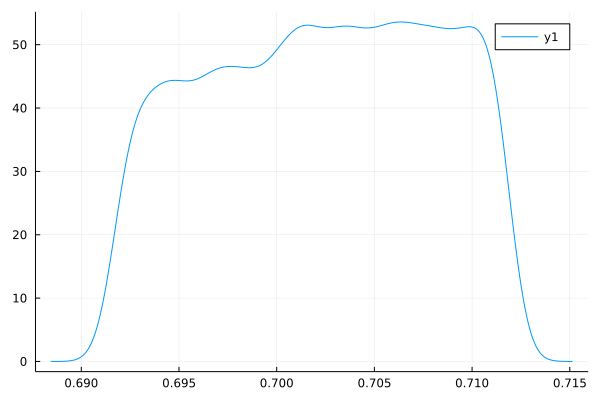

In [22]:
Pkg.add("KernelDensity")
Pkg.add("StatsPlots")

using StatsPlots, KernelDensity
dens = kde(a)
plot(dens)